In [1]:
# Reconhecimento facial eh mandar a foto e o algoritmo reconhecer quem eh a pessoa

# Carregamento da base de dados OU CARREGAR GOOGLE DRIVE
# Yale faces database: http://vision.ucsd.edu/content/yale-face-database

# http://cvc.cs.yale.edu/cvc/projects/yalefacesB/yalefacesB.html
# https://drive.google.com/drive/folders/1UBHOwVEyR5OXyWVHO-r2lviJy2Oz_Sqk
# https://www.kaggle.com/datasets/olgabelitskaya/yale-face-database

In [2]:
# Montar google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
 # Importar bibliotecas
 import os # pacote para interagir com o sistema operacional
 from PIL import Image # pacote de processamento de img no PY, para ler a base de dados
 import cv2
 import numpy as np # lib para ler vetores e matrizes do PY e alguns calculos matematicos
 from google.colab.patches import cv2_imshow # para visualizar as imgs

# OU montar o drive apartir daqui...
# from google.colab import drive
# drive.mount('/content/drive')


In [4]:
# descompactar arquivo
import zipfile
# Atualize o caminho para apontar para o arquivo zip, não para o diretório
path = '/content/drive/MyDrive/Visao Computacional Guia Completo/Datasets/yalefaces.zip' # Assumindo que o nome do arquivo zip é yalefaces.zip
zip_object = zipfile.ZipFile(file=path, mode= 'r') # r que vai fazer a leitura do arquivo
zip_object.extractall('./') # extrair na raiz do google colab
zip_object.close() # liberar memoria
# file  /content/yalefaces/train/subject01.glasses.gif eh o subject de cada img person, all img person, BASE DE DADOS de treinamento
# varias imgs da mesma pessoa com varias formatos no rosto, mais facil para o algoritmo se adaptar as faces

In [5]:
# Pre processamento das imagens

import os # para ter recursos do sistema operacional
print(os.listdir('/content/yalefaces/train')) # liste tudo que tiver nesse diretorio, passar por todas as imgs do treinamento
# ele lista todas as imgs da pasta


['subject03.surprised.gif', 'subject10.happy.gif', 'subject14.rightlight.gif', 'subject03.centerlight.gif', 'subject10.rightlight.gif', 'subject04.happy.gif', 'subject06.sad.gif', 'subject04.wink.gif', 'subject01.surprised.gif', 'subject13.centerlight.gif', 'subject11.rightlight.gif', 'subject08.sad.gif', 'subject09.sleepy.gif', 'subject09.glasses.gif', 'subject06.wink.gif', 'subject15.centerlight.gif', 'subject02.happy.gif', 'subject07.noglasses.gif', 'subject05.noglasses.gif', 'subject05.glasses.gif', 'subject07.rightlight.gif', 'subject09.leftlight.gif', 'subject13.glasses.gif', 'subject09.centerlight.gif', 'subject12.leftlight.gif', 'subject07.glasses.gif', 'subject13.happy.gif', 'subject05.sad.gif', 'subject01.rightlight.gif', 'subject14.leftlight.gif', 'subject06.normal.gif', 'subject10.wink.gif', 'subject11.noglasses.gif', 'subject15.noglasses.gif', 'subject09.happy.gif', 'subject14.centerlight.gif', 'subject12.surprised.gif', 'subject01.noglasses.gif', 'subject04.noglasses.gif'

In [6]:
# percorrer todas as imgs e extrair os pixels
def get_image_data(): # get data img
  paths = [os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')] # lista de caminhos,  # variavel de lista []
  # print(paths) # cria a funcao
  # join tras uma string com o caminho completo
  # for percorre cada uma das imgs

  # criar listas para perorrer (nome id numero na img, ids => numero da pessoa, faces eh o numero dos pixels)
  # vamos associar ids e pixels
  faces = [] # lista vazia
  ids = [] # lista vazia
  for path in paths: # for para percorrer cada img
    # print(path) # mostra o caminho completo da img
    imagem = Image.open(path).convert('L') # abre a img, converte para escala de cinza, fazer a leitura
    # print(type(imagem)) # mostra o tipo da imagem
    imagem_np = np.array(imagem, 'uint8') # converte a imagem,     # converter do PIL para numpy, uint8_matriz com numeros inteiros
    # print(type(imagem_np)) # cada img representada por uma img numpy

    # buscar o id da img
    # quebrar a string em 3 partes apos o (.) ponto
    # print(os.path.split(path) [1]) # deixa somente o caminho da img

    # combinar os dois codigos
    # id = os.path.split(path)[1].split('.')[0]
    # id = path.split('.')[0] # agora temos parte 0,1,2 da string, e o id esta na posicao 0 [0], com o comando isso some e fica somente o caminho 0

    # agora somente os ids
    id = int(os.path.split(path)[1].split('.')[0].replace('subject','')) # int para fcar inteiro
    # print(id)

    # ver array
    ids.append(id)
    faces.append(imagem_np)

  return np.array(ids), faces # retornar os arrays



In [7]:
# chama a funcao, join junta nome da img com o nome do dir  caminho completo
# resposta => ['/content/yalefaces/train/subject07.surprised.gif', '/content/yalefaces/train/subject07.rightlight.gif', '/content/yalefaces/train/subject06.sad.gif',....................
ids, faces = get_image_data() # coloca todas as variaves para ver os pixels

In [ ]:
ids

array([ 7,  7,  6, 15, 15, 13, 13, 10,  1,  3,  2,  5, 13,  8, 11,  5, 13,
        5,  9,  7,  7,  9,  9, 12,  9, 11,  1,  1, 10,  3,  1, 14,  2,  6,
        1, 11,  9,  8, 11, 12, 14,  5,  2,  4,  1, 15,  2, 11,  6, 10,  4,
        8,  3, 15,  4,  5, 14,  8, 15,  2,  9,  2,  4,  3, 14,  8, 13,  8,
       14,  8, 12,  7,  7,  6,  4, 10, 13, 10, 12,  8,  4,  5, 13, 14,  9,
        4, 12,  5, 10, 15,  6,  7, 11,  1,  6,  8,  3,  6, 10,  3,  5, 14,
        2,  3, 11,  6,  7,  2,  4,  9,  1, 11, 12, 13,  9,  2, 14,  5,  3,
       12, 15,  1, 10, 12,  4, 11,  3, 14, 10, 15, 15, 13, 12,  6,  7])

In [8]:
len(ids) # ver qtas imgs 135

135

In [9]:
len(faces) # ver tb as matrizes com os pixels

135

In [10]:
faces # um array para cada uma das faces, de 0 a 255 que representa os pixels

[array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 243, 255, 255],
        [255, 255, 255, ..., 238, 241, 255],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 array([[105, 103, 103, ..., 255, 255, 255],
        [228, 221, 223, ..., 255, 255, 255],
        [218, 203, 222, ..., 255, 255, 255],
        ...,
        [ 80,  81,  83, ..., 255, 255, 255],
        [ 80,  82,  83, ..., 255, 255, 255],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 25

In [ ]:
faces[0], faces[0].shape # ver os pixels somente da primeira img

(array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 (243, 320))

array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8)
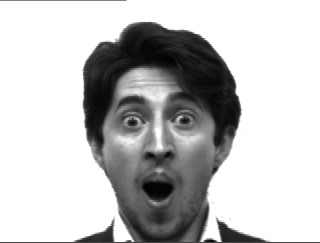

In [13]:
faces[0]

In [16]:
# ver qtdade de pixels, porque a img eh tom de cinza se fosse RGP seria x3
243 * 320

77760

In [15]:
ids[0]

np.int64(3)

In [17]:
#  se a img fosse RGB colorida, respo de valores em cada uma das imgs
243 * 320, 243 * 320 * 3

(77760, 233280)

# Treinamento do classificador LBPH

In [18]:
# o open_cv ja tem implementado esse algoritmo

# usando as imgs de treinamento para o algoritmo aprender os istogramas, depois usar as imgs de teste para medir o desenpenho
lbph_classifer = cv2.face.LBPHFaceRecognizer_create()   # variavel
lbph_classifer.train(faces, ids) # treina o classificador . Faces os pixel e ids a pessoa ex 10 umero
lbph_classifer.write('lbph_classifier.yml') # gerar o codigo para o treinamento

# Reconhecimento de faces

In [20]:
lbph_face_classifer = cv2.face.LBPHFaceRecognizer_create()   # variavel# cria o obj dessa classe para carregar o arquivo (agora que o file yml esta no proj)
lbph_face_classifer.read('/content/lbph_classifier.yml') # carregar o arquivo, executa o codigo


In [21]:
imagem_teste = '/content/yalefaces/test/subject10.sad.gif' # variavel que armazena o caminho

array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 241, 255, 255],
       [255, 255, 255, ..., 234, 237, 252],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8)
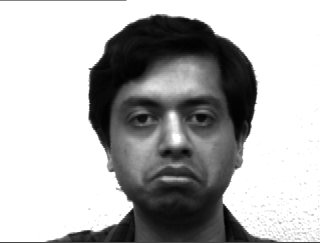

In [22]:
imagem = Image.open(imagem_teste).convert('L') # abre a img, converte para escala de cinza, fazer a leitura
imagem_np = np.array(imagem, 'uint8') # converte a imagem
imagem_np

In [23]:
imagem_np.shape # img possui (243, 320) pixels

(243, 320)

In [24]:
# previsao
previsao = lbph_face_classifer.predict(imagem_np)
previsao # 1 valor eh a classe a img foi classificada como num 10, e o 2 a confianca da deteccao 6.38

(10, 6.384336446373091)

In [25]:
# para estrair somente a classe
previsao[0]

10

In [26]:
# fazer um comparativo com a img 10, extrair o resuldado para comparar os resultados
saida_esperada = int(os.path.split(imagem_teste)[1].split('.')[0].replace('subject',''))
saida_esperada # codigo interessante qdo trab todas as imgs da base de dados

10